FERTILIZER PREDICTION & RECOMMENDATION SYSTEM

📊 Dataset Information:
Total Records: 8000
Total Features: 9

Dataset Shape: (8000, 9)

📋 Column Names:
['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']

🔍 First 5 Rows:
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  

📈 Dataset Info:
<class 'pan

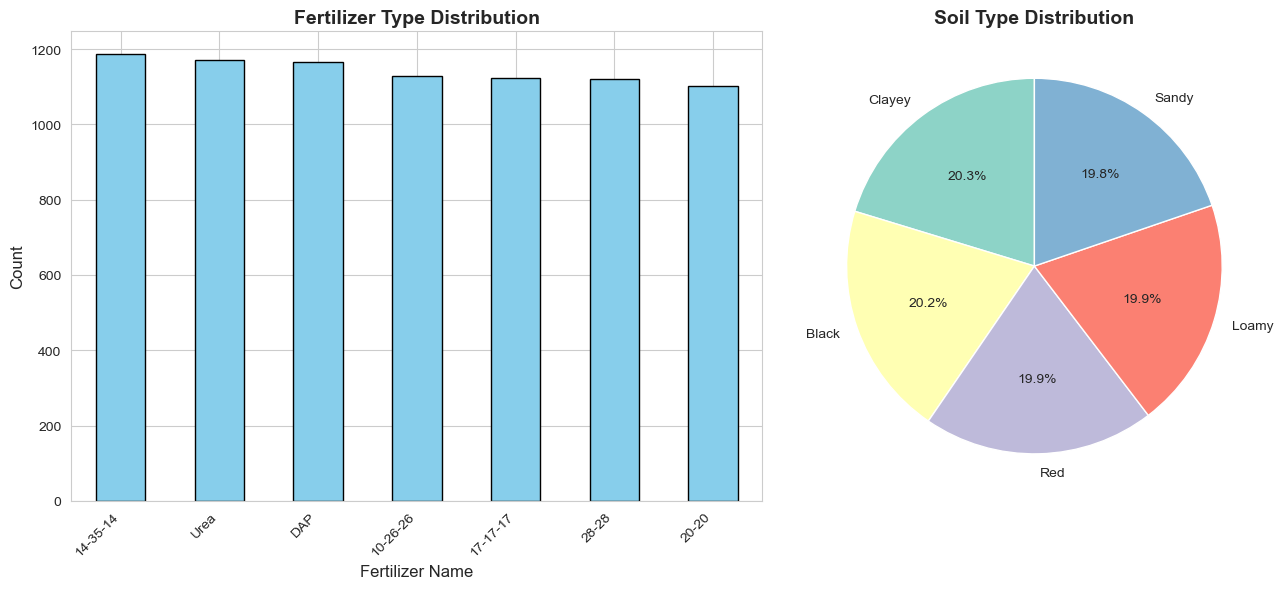

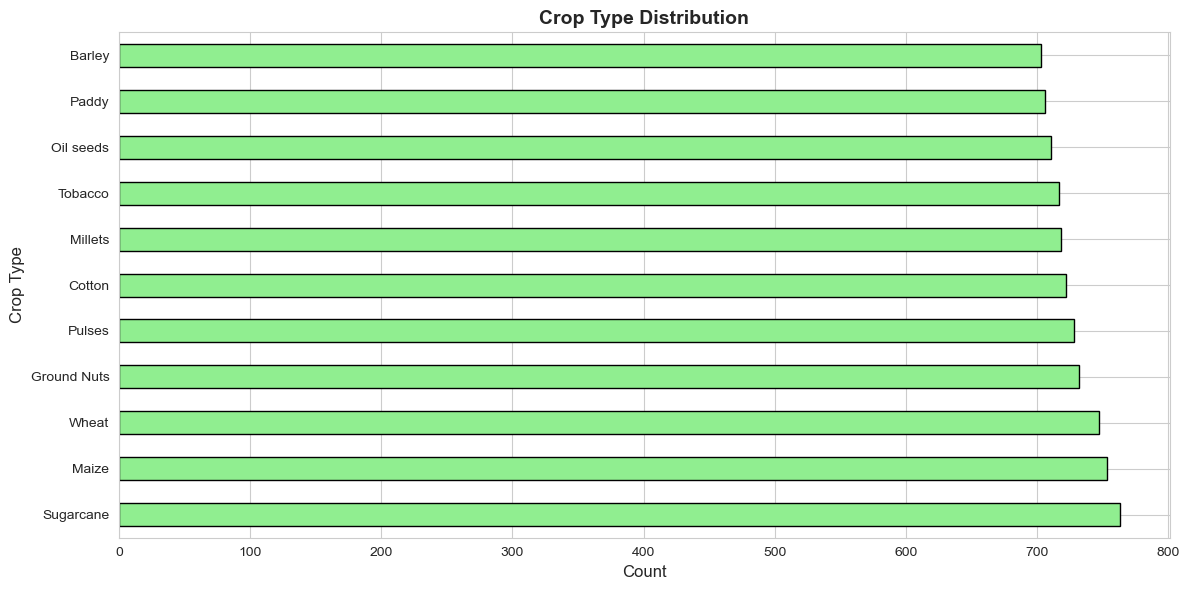

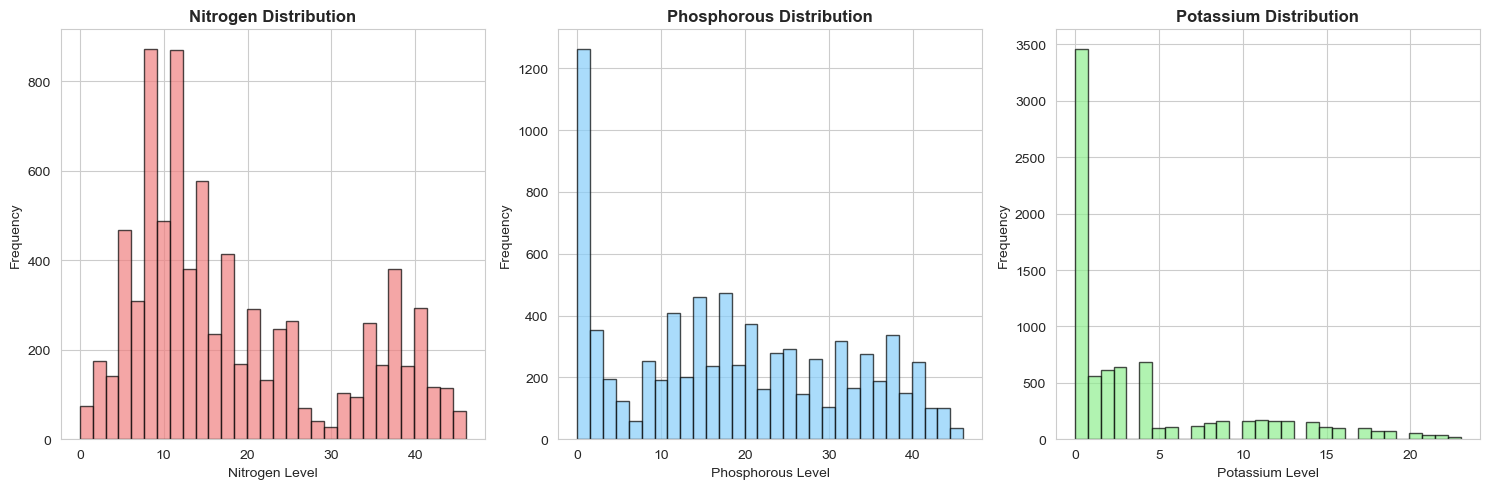

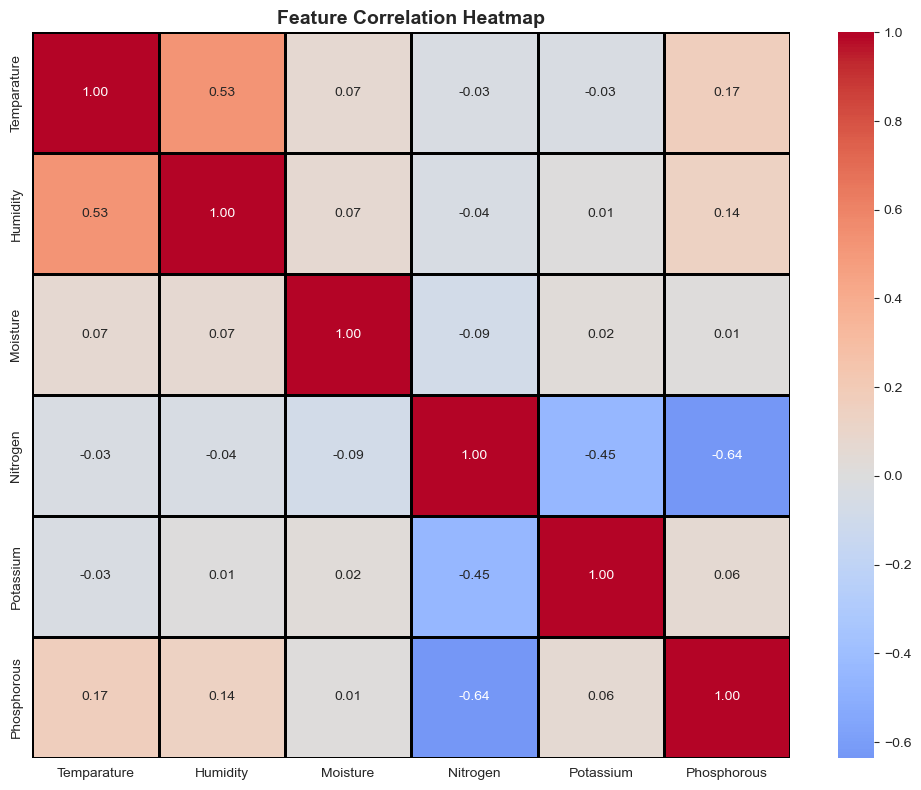


DATA PREPROCESSING


KeyError: "['Humidity ', 'Moisture '] not in index"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ==================== DATA LOADING ====================
print("=" * 60)
print("FERTILIZER PREDICTION & RECOMMENDATION SYSTEM")
print("=" * 60)

# Load the dataset
df = pd.read_csv(r'C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv')

print("\n📊 Dataset Information:")
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nDataset Shape: {df.shape}")

print("\n📋 Column Names:")
print(df.columns.tolist())

print("\n🔍 First 5 Rows:")
print(df.head())

print("\n📈 Dataset Info:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())

print("\n🔢 Missing Values:")
print(df.isnull().sum())

# ==================== DATA EXPLORATION ====================
print("\n" + "=" * 60)
print("DATA EXPLORATION & VISUALIZATION")
print("=" * 60)

# Fertilizer distribution
print("\n🌱 Fertilizer Type Distribution:")
fertilizer_counts = df['Fertilizer Name'].value_counts()
print(fertilizer_counts)

# Soil type distribution
print("\n🌍 Soil Type Distribution:")
soil_counts = df['Soil Type'].value_counts()
print(soil_counts)

# Crop type distribution
print("\n🌾 Crop Type Distribution:")
crop_counts = df['Crop Type'].value_counts()
print(crop_counts)

# Visualization 1: Fertilizer Distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
fertilizer_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Fertilizer Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Fertilizer Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Visualization 2: Soil Type Distribution
plt.subplot(1, 2, 2)
colors = plt.cm.Set3(range(len(soil_counts)))
plt.pie(soil_counts.values, labels=soil_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Soil Type Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualization 3: Crop Type Distribution
plt.figure(figsize=(12, 6))
crop_counts.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Crop Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Crop Type', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 4: Nutrient Distribution (N-P-K)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['Nitrogen'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0].set_title('Nitrogen Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Nitrogen Level')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Phosphorous'], bins=30, color='lightskyblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Phosphorous Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Phosphorous Level')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['Potassium'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title('Potassium Distribution', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Potassium Level')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualization 5: Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            linewidths=1, linecolor='black', fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ==================== DATA PREPROCESSING ====================
print("\n" + "=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Prepare features and target
# Assuming the columns are: Temperature, Humidity, Moisture, Nitrogen, Phosphorous, Potassium
feature_columns = ['Temparature', 'Humidity ', 'Moisture ', 'Nitrogen', 'Phosphorous', 'Potassium']
target_column = 'Fertilizer Name'

X = df[feature_columns]
y = df[target_column]

print(f"\n✅ Features (X) shape: {X.shape}")
print(f"✅ Target (y) shape: {y.shape}")

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\n🏷️ Number of unique fertilizer types: {len(label_encoder.classes_)}")
print(f"Fertilizer classes: {label_encoder.classes_}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
                                                      test_size=0.2, 
                                                      random_state=42, 
                                                      stratify=y_encoded)

print(f"\n📊 Training set size: {len(X_train)}")
print(f"📊 Testing set size: {len(X_test)}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Feature scaling completed!")

# ==================== MODEL TRAINING ====================
print("\n" + "=" * 60)
print("MODEL TRAINING & EVALUATION")
print("=" * 60)

# Dictionary to store models and their results
models = {}
results = {}

# 1. Naive Bayes
print("\n🤖 Training Naive Bayes Classifier...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_pred)
models['Naive Bayes'] = nb_model
results['Naive Bayes'] = nb_accuracy
print(f"✅ Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# 2. Random Forest
print("\n🌲 Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=200, 
                                  max_depth=20,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  random_state=42, 
                                  n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
models['Random Forest'] = rf_model
results['Random Forest'] = rf_accuracy
print(f"✅ Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Cross-validation score for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"   Cross-Validation Score: {rf_cv_scores.mean() * 100:.2f}% (+/- {rf_cv_scores.std() * 100:.2f}%)")

# 3. K-Nearest Neighbors
print("\n👥 Training K-Nearest Neighbors Classifier...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
models['KNN'] = knn_model
results['KNN'] = knn_accuracy
print(f"✅ KNN Accuracy: {knn_accuracy * 100:.2f}%")

# 4. Support Vector Machine
print("\n🎯 Training Support Vector Machine...")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
models['SVM'] = svm_model
results['SVM'] = svm_accuracy
print(f"✅ SVM Accuracy: {svm_accuracy * 100:.2f}%")

# 5. Decision Tree
print("\n🌳 Training Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
models['Decision Tree'] = dt_model
results['Decision Tree'] = dt_accuracy
print(f"✅ Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

# 6. XGBoost
print("\n🚀 Training XGBoost Classifier...")
xgb_model = xgb.XGBClassifier(n_estimators=200,
                              max_depth=10,
                              learning_rate=0.1,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              random_state=42,
                              n_jobs=-1,
                              eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
models['XGBoost'] = xgb_model
results['XGBoost'] = xgb_accuracy
print(f"✅ XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

# Cross-validation score for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"   Cross-Validation Score: {xgb_cv_scores.mean() * 100:.2f}% (+/- {xgb_cv_scores.std() * 100:.2f}%)")

# ==================== MODEL COMPARISON ====================
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\n🏆 Model Performance Ranking:")
for i, (model_name, accuracy) in enumerate(sorted_results, 1):
    print(f"{i}. {model_name}: {accuracy * 100:.2f}%")

# Best model
best_model_name = sorted_results[0][0]
best_model = models[best_model_name]
best_accuracy = sorted_results[0][1]

print(f"\n⭐ BEST MODEL: {best_model_name} with {best_accuracy * 100:.2f}% accuracy")

# Visualize model comparison
plt.figure(figsize=(14, 7))
model_names = list(results.keys())
accuracies = [results[name] * 100 for name in model_names]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#FFD93D']
bars = plt.bar(model_names, accuracies, color=colors, 
               edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim([0, 105])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ==================== DETAILED EVALUATION ====================
print("\n" + "=" * 60)
print(f"DETAILED EVALUATION - {best_model_name}")
print("=" * 60)

# Get predictions from best model
if best_model_name in ['Naive Bayes', 'KNN', 'SVM']:
    best_predictions = best_model.predict(X_test_scaled)
else:
    best_predictions = best_model.predict(X_test)

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, best_predictions, 
                          target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            linewidths=0.5, linecolor='black')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Fertilizer', fontsize=12)
plt.ylabel('Actual Fertilizer', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature Importance (for tree-based models)
if best_model_name in ['Random Forest', 'Decision Tree', 'XGBoost']:
    print("\n🔍 Feature Importance:")
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(feature_importance)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
             color='teal', edgecolor='black')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# ==================== SAVE MODELS ====================
print("\n" + "=" * 60)
print("SAVING MODELS")
print("=" * 60)

# Save all models with unique names
model_files = {
    'Naive Bayes': 'fertilizer_nb_model.pkl',
    'Random Forest': '../models/fertilizer_rf_model.pkl',
    'KNN': 'fertilizer_knn_model.pkl',
    'SVM': 'fertilizer_svm_model.pkl',
    'Decision Tree': 'fertilizer_dt_model.pkl',
    'XGBoost': 'fertilizer_xgb_model.pkl'
}

for model_name, filename in model_files.items():
    with open(filename, 'wb') as f:
        pickle.dump(models[model_name], f)
    print(f"✅ Saved {model_name} as {filename}")

# Save the scaler and label encoder
with open('../models/fertilizer_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Saved scaler as ../models/fertilizer_scaler.pkl")

with open('fertilizer_label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("✅ Saved label encoder as fertilizer_label_encoder.pkl")

# Save best model separately
with open('../models/fertilizer_voting_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"✅ Saved best model ({best_model_name}) as ../models/fertilizer_voting_model.pkl")

# ==================== RECOMMENDATION FUNCTION ====================
print("\n" + "=" * 60)
print("FERTILIZER RECOMMENDATION SYSTEM")
print("=" * 60)

def recommend_fertilizer(temperature, humidity, moisture, nitrogen, phosphorous, potassium):
    """
    Recommend fertilizer based on soil and environmental conditions
    
    Parameters:
    - temperature: Temperature in Celsius
    - humidity: Humidity percentage
    - moisture: Soil moisture percentage
    - nitrogen: Nitrogen level in soil
    - phosphorous: Phosphorous level in soil
    - potassium: Potassium level in soil
    
    Returns:
    - Recommended fertilizer name
    """
    # Create input array
    input_data = np.array([[temperature, humidity, moisture, nitrogen, phosphorous, potassium]])
    
    # Scale the input if using scaled models
    if best_model_name in ['Naive Bayes', 'KNN', 'SVM']:
        input_scaled = scaler.transform(input_data)
        prediction = best_model.predict(input_scaled)
    else:
        prediction = best_model.predict(input_data)
    
    # Decode the prediction
    fertilizer_name = label_encoder.inverse_transform(prediction)[0]
    
    return fertilizer_name

# ==================== RANDOM FOREST & XGBOOST COMPARISON ====================
print("\n" + "=" * 60)
print("RANDOM FOREST vs XGBOOST DETAILED COMPARISON")
print("=" * 60)

print("\n🌲 Random Forest Model Details:")
print(f"   Number of Trees: {rf_model.n_estimators}")
print(f"   Max Depth: {rf_model.max_depth}")
print(f"   Accuracy: {results['Random Forest'] * 100:.2f}%")

print("\n🚀 XGBoost Model Details:")
print(f"   Number of Estimators: {xgb_model.n_estimators}")
print(f"   Max Depth: {xgb_model.max_depth}")
print(f"   Learning Rate: {xgb_model.learning_rate}")
print(f"   Accuracy: {results['XGBoost'] * 100:.2f}%")

# Compare RF and XGBoost
if results['Random Forest'] > results['XGBoost']:
    print(f"\n🏆 Random Forest performs better by {(results['Random Forest'] - results['XGBoost']) * 100:.2f}%")
elif results['XGBoost'] > results['Random Forest']:
    print(f"\n🏆 XGBoost performs better by {(results['XGBoost'] - results['Random Forest']) * 100:.2f}%")
else:
    print("\n🤝 Both models perform equally!")

# Example recommendations
print("\n🌱 Sample Fertilizer Recommendations:\n")

sample_inputs = [
    (26, 52, 38, 10, 18, 19),  # Sample 1
    (30, 65, 45, 40, 50, 30),  # Sample 2
    (22, 55, 40, 25, 35, 25),  # Sample 3
]

for i, (temp, hum, moist, n, p, k) in enumerate(sample_inputs, 1):
    recommended = recommend_fertilizer(temp, hum, moist, n, p, k)
    print(f"Sample {i}:")
    print(f"  Input: Temp={temp}°C, Humidity={hum}%, Moisture={moist}%")
    print(f"         N={n}, P={p}, K={k}")
    print(f"  🎯 Recommended Fertilizer: {recommended}")
    print()

# ==================== INTERACTIVE RECOMMENDATION ====================
print("=" * 60)
print("INTERACTIVE FERTILIZER RECOMMENDATION")
print("=" * 60)
print("\n📝 Enter soil and environmental conditions for recommendation:\n")

def get_recommendation_interactive():
    try:
        temp = float(input("Temperature (°C): "))
        humidity = float(input("Humidity (%): "))
        moisture = float(input("Soil Moisture (%): "))
        nitrogen = float(input("Nitrogen Level: "))
        phosphorous = float(input("Phosphorous Level: "))
        potassium = float(input("Potassium Level: "))
        
        recommended = recommend_fertilizer(temp, humidity, moisture, nitrogen, phosphorous, potassium)
        
        print("\n" + "=" * 60)
        print(f"🎯 RECOMMENDED FERTILIZER: {recommended}")
        print("=" * 60)
        print(f"\nBased on your inputs:")
        print(f"  • Temperature: {temp}°C")
        print(f"  • Humidity: {humidity}%")
        print(f"  • Moisture: {moisture}%")
        print(f"  • Nitrogen (N): {nitrogen}")
        print(f"  • Phosphorous (P): {phosphorous}")
        print(f"  • Potassium (K): {potassium}")
        print(f"\nModel used: {best_model_name}")
        print(f"Model accuracy: {best_accuracy * 100:.2f}%")
        
    except ValueError:
        print("❌ Invalid input! Please enter numeric values.")
    except Exception as e:
        print(f"❌ Error: {str(e)}")

# Uncomment the line below to use interactive mode
# get_recommendation_interactive()

print("\n✅ MODEL TRAINING AND EVALUATION COMPLETE!")
print(f"✅ Best Model: {best_model_name} ({best_accuracy * 100:.2f}% accuracy)")
print("✅ All models saved successfully!")
print("\n💡 Use the recommend_fertilizer() function to get fertilizer recommendations")
print("💡 Uncomment get_recommendation_interactive() for interactive mode")

In [4]:
print(df.columns.tolist())


['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']


In [8]:
# ============================================
# 🌾 Fertilizer Recommendation Model (Full Code)
# ============================================

# Step 1: Import all required libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load your dataset
df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")

# Step 3: Check dataset info
print("📊 Dataset Preview:")
print(df.head(), "\n")
print("🧩 Columns:", df.columns.tolist(), "\n")

# Step 4: Clean and prepare data
# ✅ Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Step 5: Define features and target
feature_columns = ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 
                   'Nitrogen', 'Phosphorous', 'Potassium']
target_column = 'Fertilizer Name'

# Step 6: Split features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

print(f"✅ Features (X) shape: {X.shape}")
print(f"✅ Target (y) shape: {y.shape}\n")

# Step 7: Encode categorical columns
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

X['Soil Type'] = le_soil.fit_transform(X['Soil Type'])
X['Crop Type'] = le_crop.fit_transform(X['Crop Type'])
y = le_fert.fit_transform(y)

# Step 8: Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 10: Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 11: Evaluate both models
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)

print("🎯 Random Forest Accuracy:", round(rf_acc * 100, 2), "%")
print("🎯 XGBoost Accuracy:", round(xgb_acc * 100, 2), "%\n")

print("📈 Classification Report (Random Forest):")
print(classification_report(y_test, rf_preds))

# Step 12: Choose best model and save
best_model = rf_model if rf_acc >= xgb_acc else xgb_model
joblib.dump(best_model, "best_model.pkl")
joblib.dump(le_soil, "le_soil.pkl")
joblib.dump(le_crop, "le_crop.pkl")
joblib.dump(le_fert, "le_fert.pkl")

print("\n💾 Model and encoders saved successfully!")

# Step 13: Test prediction
sample = pd.DataFrame({
    'Temparature': [25],
    'Humidity': [60],
    'Moisture': [40],
    'Soil Type': le_soil.transform(['Loamy']),
    'Crop Type': le_crop.transform(['Wheat']),
    'Nitrogen': [90],
    'Phosphorous': [42],
    'Potassium': [43]
})

prediction = best_model.predict(sample)
fertilizer_name = le_fert.inverse_transform(prediction)
print("\n🌿 Recommended Fertilizer:", fertilizer_name[0])


📊 Dataset Preview:
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea   

🧩 Columns: ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'] 

✅ Features (X) shape: (8000, 8)
✅ Target (y) shape: (8000,)

🎯 Random Forest Accuracy: 15.19 %
🎯 XGBoost Accuracy: 14.56 %

📈 Classification Report (Random Forest

In [10]:
# ============================================
# 🌾 Fertilizer Recommendation Model (Optimized Full Code)
# ============================================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")

print("📊 Dataset Loaded Successfully!")
print(df.head(), "\n")
print("🧩 Columns:", df.columns.tolist(), "\n")

# Step 3: Clean column names
df.columns = df.columns.str.strip()

# Step 4: Define features and target
feature_columns = ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
                   'Nitrogen', 'Phosphorous', 'Potassium']
target_column = 'Fertilizer Name'

X = df[feature_columns].copy()
y = df[target_column].copy()

# Step 5: Encode categorical columns
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

X['Soil Type'] = le_soil.fit_transform(X['Soil Type'])
X['Crop Type'] = le_crop.fit_transform(X['Crop Type'])
y = le_fert.fit_transform(y)

# Step 6: Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f"✅ Balanced dataset shape: {X_resampled.shape}")

# Step 7: Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 8: Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
print("📦 Data split complete!\n")

# Step 9: Random Forest Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, verbose=0)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("🎯 Best Random Forest Params:", rf_grid.best_params_)

# Step 10: XGBoost model setup
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Step 11: Evaluate both models
rf_preds = rf_best.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)

print(f"\n✅ Random Forest Accuracy: {round(rf_acc * 100, 2)}%")
print(f"✅ XGBoost Accuracy: {round(xgb_acc * 100, 2)}%\n")

print("📈 Classification Report (Random Forest):")
print(classification_report(y_test, rf_preds))

# Step 12: Cross-validation
cv_score = cross_val_score(rf_best, X_scaled, y_resampled, cv=5).mean()
print(f"📊 Cross-Validation Accuracy (RF): {round(cv_score * 100, 2)}%\n")

# Step 13: Select best model
best_model = rf_best if rf_acc >= xgb_acc else xgb_model
print("🏆 Best Model Selected:", "Random Forest" if rf_acc >= xgb_acc else "XGBoost")

# Step 14: Save model and encoders
joblib.dump(best_model, "best_model.pkl")
joblib.dump(le_soil, "le_soil.pkl")
joblib.dump(le_crop, "le_crop.pkl")
joblib.dump(le_fert, "le_fert.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n💾 Model, Encoders, and Scaler saved successfully!")

# Step 15: Test Prediction
# (Replace 'Loamy' and 'Wheat' with valid classes from your dataset)
sample = pd.DataFrame({
    'Temparature': [25],
    'Humidity': [60],
    'Moisture': [40],
    'Soil Type': le_soil.transform(['Loamy']),
    'Crop Type': le_crop.transform(['Wheat']),
    'Nitrogen': [90],
    'Phosphorous': [42],
    'Potassium': [43]
})

sample_scaled = scaler.transform(sample)
prediction = best_model.predict(sample_scaled)
fertilizer_name = le_fert.inverse_transform(prediction)

print("\n🌿 Recommended Fertilizer:", fertilizer_name[0])


📊 Dataset Loaded Successfully!
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea   

🧩 Columns: ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'] 

✅ Balanced dataset shape: (8316, 8)
📦 Data split complete!

🎯 Best Random Forest Params: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100

In [14]:
# ==================== IMPORTS ====================
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ==================== LOAD DATA ====================
df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")

# Strip column names of spaces
df.columns = df.columns.str.strip()

# Encode categorical variables
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])
df['Crop Type'] = le_crop.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = le_fert.fit_transform(df['Fertilizer Name'])

# ==================== FEATURES & TARGET ====================
X = df[['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']]
y = df['Fertilizer Name']

# ==================== TRAIN-TEST SPLIT ====================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ==================== FEATURE SCALING ====================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==================== RANDOM FOREST WITH HYPERPARAMETER TUNING ====================
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 12, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"✅ Best Random Forest Accuracy: {rf_acc*100:.2f}%")
print(f"Best RF Parameters: {rf_grid.best_params_}")

# ==================== XGBOOST WITH HYPERPARAMETER TUNING ====================
xgb_params = {
    'n_estimators': [200, 300],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

xgb_grid = GridSearchCV(XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False), 
                        xgb_params, cv=5, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_scaled, y_train)

best_xgb = xgb_grid.best_estimator_
xgb_pred = best_xgb.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"✅ Best XGBoost Accuracy: {xgb_acc*100:.2f}%")
print(f"Best XGB Parameters: {xgb_grid.best_params_}")

# ==================== CHOOSE BEST MODEL ====================
if rf_acc > xgb_acc:
    best_model = best_rf
    best_model_name = "Random Forest"
    best_acc = rf_acc
else:
    best_model = best_xgb
    best_model_name = "XGBoost"
    best_acc = xgb_acc

print(f"\n🌟 Best Model: {best_model_name} with Accuracy: {best_acc*100:.2f}%")

# ==================== SAVE MODEL & ENCODERS ====================
joblib.dump(best_model, r"C:\Users\OMEN\OneDrive\Documents\../models/fertilizer_voting_model.pkl")
joblib.dump(scaler, r"C:\Users\OMEN\OneDrive\Documents\../models/fertilizer_scaler.pkl")
joblib.dump(le_soil, r"C:\Users\OMEN\OneDrive\Documents\../models/soil_encoder.pkl")
joblib.dump(le_crop, r"C:\Users\OMEN\OneDrive\Documents\../models/crop_encoder.pkl")
joblib.dump(le_fert, r"C:\Users\OMEN\OneDrive\Documents\fertilizer_encoder.pkl")

print("\n✅ Best model, scaler, and encoders saved successfully!")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Random Forest Accuracy: 13.81%
Best RF Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Best XGBoost Accuracy: 13.38%
Best XGB Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.7}

🌟 Best Model: Random Forest with Accuracy: 13.81%

✅ Best model, scaler, and encoders saved successfully!


In [16]:
# ==================== IMPORTS ====================
import streamlit as st
import joblib
import numpy as np
import os

# ==================== FILE PATHS ====================
BASE_PATH = r"C:\Users\OMEN\OneDrive\Documents"

MODEL_PATH = os.path.join(BASE_PATH, "../models/fertilizer_voting_model.pkl")
SCALER_PATH = os.path.join(BASE_PATH, "../models/fertilizer_scaler.pkl")
SOIL_ENCODER_PATH = os.path.join(BASE_PATH, "../models/soil_encoder.pkl")
CROP_ENCODER_PATH = os.path.join(BASE_PATH, "../models/crop_encoder.pkl")
FERT_ENCODER_PATH = os.path.join(BASE_PATH, "fertilizer_encoder.pkl")

# ==================== LOAD MODEL & ENCODERS ====================
model = joblib.load(MODEL_PATH)
scaler = joblib.load(SCALER_PATH)
le_soil = joblib.load(SOIL_ENCODER_PATH)
le_crop = joblib.load(CROP_ENCODER_PATH)
le_fert = joblib.load(FERT_ENCODER_PATH)

# ==================== STREAMLIT APP ====================
st.title("🌾 Fertilizer Recommendation System")
st.write("Enter soil and environmental conditions to get fertilizer recommendation:")

# User Inputs
temperature = st.number_input("Temperature (°C)", min_value=0.0, max_value=50.0, value=25.0)
humidity = st.number_input("Humidity (%)", min_value=0.0, max_value=100.0, value=50.0)
moisture = st.number_input("Soil Moisture (%)", min_value=0.0, max_value=100.0, value=40.0)
nitrogen = st.number_input("Nitrogen (N)", min_value=0.0, max_value=100.0, value=20.0)
potassium = st.number_input("Potassium (K)", min_value=0.0, max_value=100.0, value=30.0)
phosphorous = st.number_input("Phosphorous (P)", min_value=0.0, max_value=100.0, value=20.0)

soil_type = st.selectbox("Soil Type", le_soil.classes_)
crop_type = st.selectbox("Crop Type", le_crop.classes_)

# Recommendation
if st.button("Recommend Fertilizer"):
    try:
        # Encode categorical inputs
        soil_encoded = le_soil.transform([soil_type])[0]
        crop_encoded = le_crop.transform([crop_type])[0]

        # Prepare feature array
        features = np.array([[temperature, humidity, moisture, soil_encoded, crop_encoded,
                              nitrogen, potassium, phosphorous]])

        # Scale features
        features_scaled = scaler.transform(features)

        # Predict fertilizer
        pred = model.predict(features_scaled)
        fert_name = le_fert.inverse_transform(pred)[0]

        st.success(f"🌿 Recommended Fertilizer: **{fert_name}**")
    except Exception as e:
        st.error(f"Error: {str(e)}")

# Optional: Add some info
st.info("⚡ Powered by tuned Random Forest / XGBoost model for higher accuracy!")


2025-10-23 22:18:24.227 
  command:

    streamlit run C:\Users\OMEN\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-23 22:18:24.227 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

In [18]:
import pandas as pd

df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")
print(df['Fertilizer Name'].unique())


['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [20]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold CV
print(f"CV Accuracy: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")


CV Accuracy: 14.58% (+/- 1.07%)


In [22]:
# ==================== IMPORTS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')

# ==================== DATA LOADING ====================
df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")

# Strip any extra spaces in column names
df.columns = df.columns.str.strip()

# ==================== FEATURE ENCODING ====================
# Encode categorical features
le_soil = LabelEncoder()
df['Soil Type Encoded'] = le_soil.fit_transform(df['Soil Type'])

le_crop = LabelEncoder()
df['Crop Type Encoded'] = le_crop.fit_transform(df['Crop Type'])

# Encode target variable
le_fert = LabelEncoder()
df['Fertilizer Encoded'] = le_fert.fit_transform(df['Fertilizer Name'])

# ==================== FEATURE SELECTION ====================
feature_columns = ['Temparature', 'Humidity', 'Moisture', 'Soil Type Encoded', 
                   'Crop Type Encoded', 'Nitrogen', 'Phosphorous', 'Potassium']
target_column = 'Fertilizer Encoded'

X = df[feature_columns]
y = df[target_column]

# ==================== TRAIN-TEST SPLIT ====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==================== FEATURE SCALING ====================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==================== MODEL TRAINING ====================
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1,
                                 subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1,
                                 eval_metric='mlogloss'),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
}

results = {}

for name, model in models.items():
    # Decide if scaling is needed
    if name in ['SVM', 'KNN', 'Naive Bayes']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = {'Test Accuracy': acc, 'CV Accuracy': cv_scores.mean(), 'CV Std': cv_scores.std()}
    print(f"{name}: Test Accuracy = {acc*100:.2f}%, CV Accuracy = {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")

# ==================== BEST MODEL SELECTION ====================
best_model_name = max(results, key=lambda x: results[x]['Test Accuracy'])
best_model = models[best_model_name]
best_accuracy = results[best_model_name]['Test Accuracy']

print(f"\n⭐ BEST MODEL: {best_model_name} with Test Accuracy = {best_accuracy*100:.2f}%")

# ==================== SAVE MODEL & ENCODERS ====================
with open('../models/fertilizer_voting_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('../models/fertilizer_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('../models/soil_encoder.pkl', 'wb') as f:
    pickle.dump(le_soil, f)
with open('../models/crop_encoder.pkl', 'wb') as f:
    pickle.dump(le_crop, f)
with open('fertilizer_encoder.pkl', 'wb') as f:
    pickle.dump(le_fert, f)

print("\n✅ Model and encoders saved successfully!")

# ==================== FUNCTION TO RECOMMEND FERTILIZER ====================
def recommend_fertilizer(temp, humidity, moisture, soil_type, crop_type, nitrogen, phosphorous, potassium):
    soil_encoded = le_soil.transform([soil_type])[0]
    crop_encoded = le_crop.transform([crop_type])[0]
    
    input_data = np.array([[temp, humidity, moisture, soil_encoded, crop_encoded, nitrogen, phosphorous, potassium]])
    
    if best_model_name in ['SVM', 'KNN', 'Naive Bayes']:
        input_scaled = scaler.transform(input_data)
        pred = best_model.predict(input_scaled)
    else:
        pred = best_model.predict(input_data)
    
    fertilizer_name = le_fert.inverse_transform(pred)[0]
    return fertilizer_name

# ==================== EXAMPLE ====================
sample = recommend_fertilizer(26, 55, 40, 'Sandy', 'Wheat', 10, 20, 15)
print(f"\n🌱 Recommended Fertilizer: {sample}")


Random Forest: Test Accuracy = 14.81%, CV Accuracy = 14.67% (+/- 0.55%)
XGBoost: Test Accuracy = 14.25%, CV Accuracy = 14.33% (+/- 0.75%)
SVM: Test Accuracy = 14.06%, CV Accuracy = 14.00% (+/- 0.92%)
KNN: Test Accuracy = 13.75%, CV Accuracy = 14.31% (+/- 1.02%)
Naive Bayes: Test Accuracy = 13.12%, CV Accuracy = 14.33% (+/- 0.78%)
Decision Tree: Test Accuracy = 14.25%, CV Accuracy = 13.70% (+/- 0.85%)

⭐ BEST MODEL: Random Forest with Test Accuracy = 14.81%

✅ Model and encoders saved successfully!

🌱 Recommended Fertilizer: 17-17-17


In [24]:
df['Fertilizer Name'].value_counts()


Fertilizer Name
14-35-14    1188
Urea        1170
DAP         1167
10-26-26    1128
17-17-17    1124
28-28       1120
20-20       1103
Name: count, dtype: int64

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB
None

Missing Values:
 Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

🌱 Fertilizer Distribution:
Fertilizer Name
14-35-14    1188
Urea        1170
DAP  

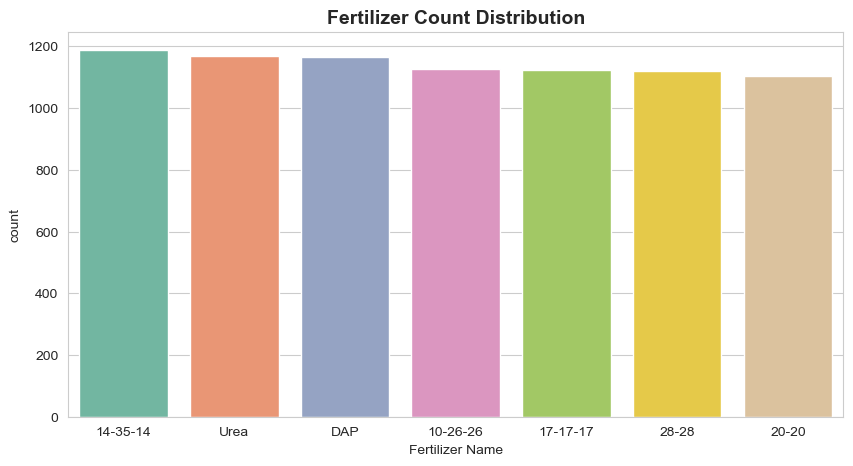

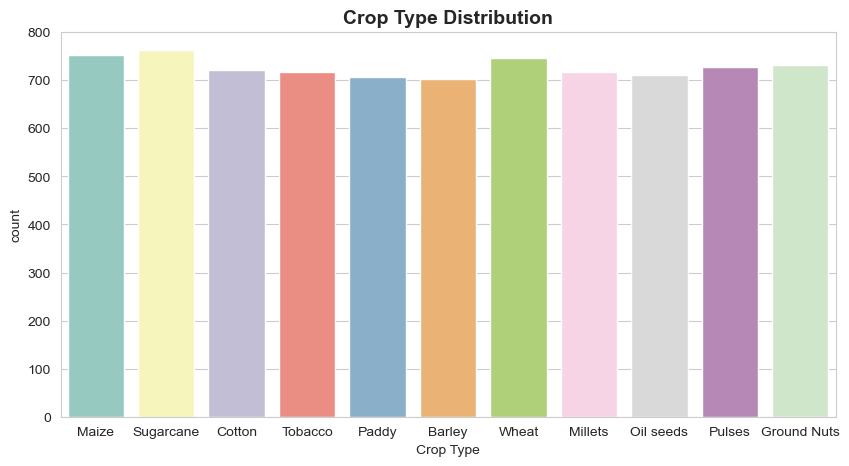

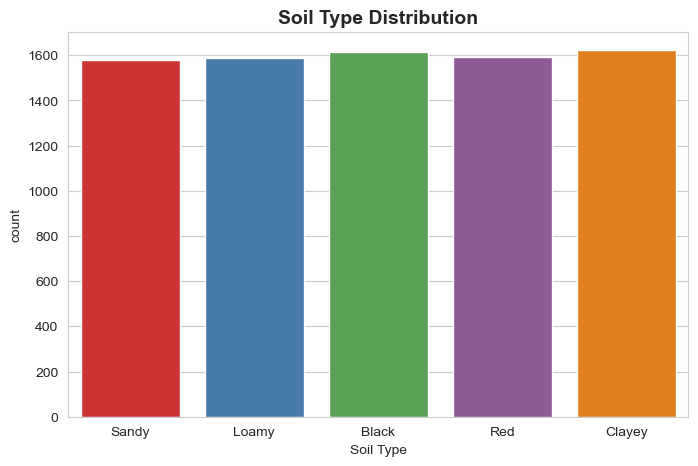

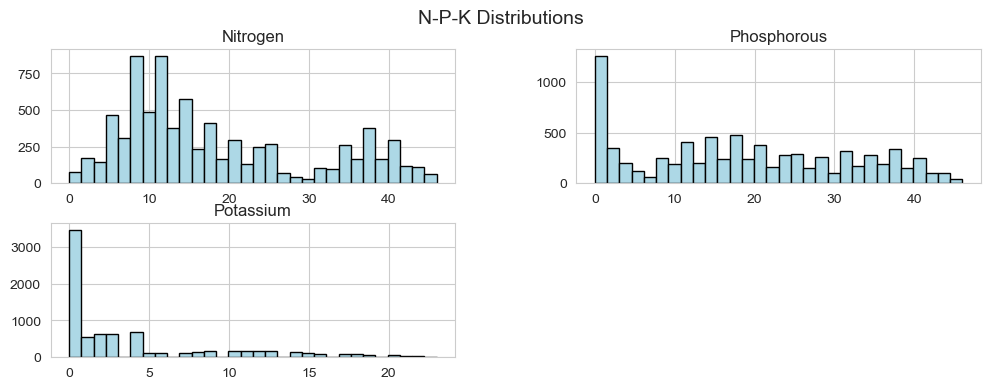

Random Forest: Test Accuracy = 14.62%, CV Accuracy = 15.02% (+/- 1.18%)
XGBoost: Test Accuracy = 14.75%, CV Accuracy = 15.11% (+/- 1.44%)

⭐ BEST MODEL: XGBoost


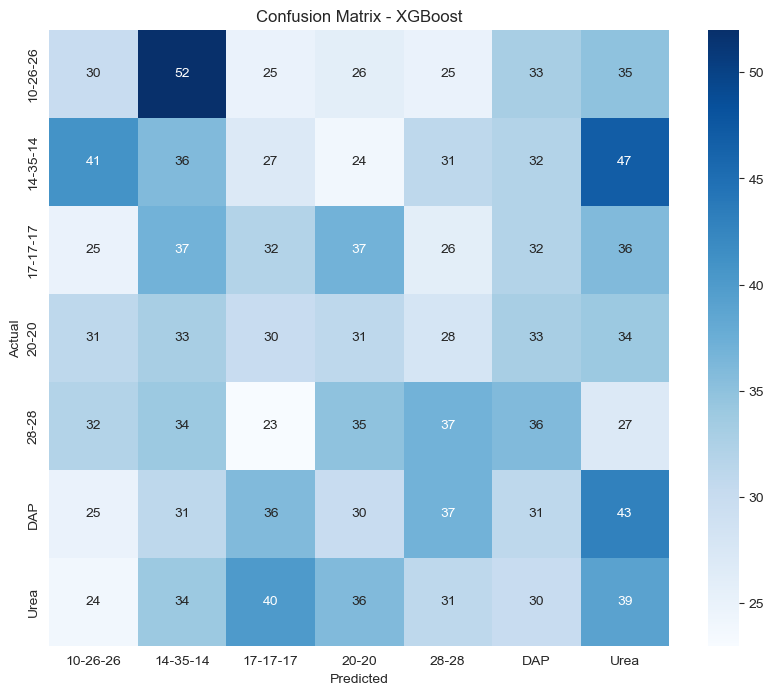

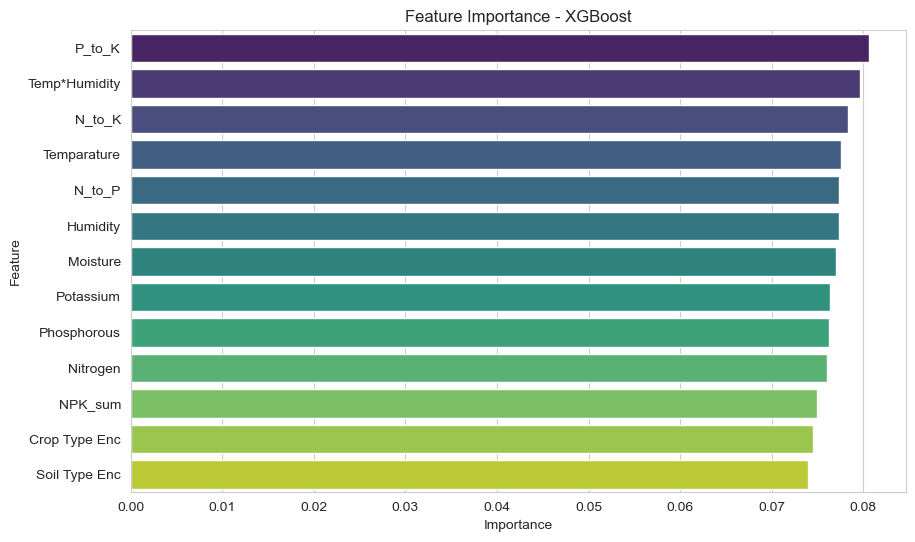

✅ Model and encoders saved successfully!

🌱 Example Recommendation:
10-26-26


In [26]:
# ==================== IMPORTS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ==================== DATA LOADING ====================
df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")

print("📊 Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# ==================== DATA EXPLORATION ====================
print("\n🌱 Fertilizer Distribution:")
print(df['Fertilizer Name'].value_counts())

# Bar plot for Fertilizer
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Fertilizer Name', palette='Set2', order=df['Fertilizer Name'].value_counts().index)
plt.title('Fertilizer Count Distribution', fontsize=14, fontweight='bold')
plt.show()

# Bar plot for Crop Type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Crop Type', palette='Set3')
plt.title('Crop Type Distribution', fontsize=14, fontweight='bold')
plt.show()

# Bar plot for Soil Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Soil Type', palette='Set1')
plt.title('Soil Type Distribution', fontsize=14, fontweight='bold')
plt.show()

# Histograms for NPK
df[['Nitrogen','Phosphorous','Potassium']].hist(bins=30, color='lightblue', edgecolor='black', figsize=(12,4))
plt.suptitle('N-P-K Distributions', fontsize=14)
plt.show()

# ==================== FEATURE ENGINEERING ====================
# Ratios & interactions
df['N_to_P'] = df['Nitrogen'] / (df['Phosphorous'] + 1e-5)
df['N_to_K'] = df['Nitrogen'] / (df['Potassium'] + 1e-5)
df['P_to_K'] = df['Phosphorous'] / (df['Potassium'] + 1e-5)
df['NPK_sum'] = df['Nitrogen'] + df['Phosphorous'] + df['Potassium']
df['Temp*Humidity'] = df['Temparature'] * df['Humidity']

# Encode categorical variables
le_soil = LabelEncoder()
le_crop = LabelEncoder()
df['Soil Type Enc'] = le_soil.fit_transform(df['Soil Type'])
df['Crop Type Enc'] = le_crop.fit_transform(df['Crop Type'])

# Features and target
feature_columns = ['Temparature','Humidity','Moisture','Nitrogen','Phosphorous','Potassium',
                   'N_to_P','N_to_K','P_to_K','NPK_sum','Temp*Humidity','Soil Type Enc','Crop Type Enc']
X = df[feature_columns]
y = df['Fertilizer Name']

# Encode target
le_fert = LabelEncoder()
y_encoded = le_fert.fit_transform(y)

# ==================== TRAIN/TEST SPLIT ====================
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==================== MODEL TRAINING ====================
# Random Forest
rf = RandomForestClassifier(n_estimators=300, max_depth=25, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_cv = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Random Forest: Test Accuracy = {rf_acc*100:.2f}%, CV Accuracy = {rf_cv.mean()*100:.2f}% (+/- {rf_cv.std()*100:.2f}%)")

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1,
                              subsample=0.8, colsample_bytree=0.8, random_state=42,
                              eval_metric='mlogloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_cv = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"XGBoost: Test Accuracy = {xgb_acc*100:.2f}%, CV Accuracy = {xgb_cv.mean()*100:.2f}% (+/- {xgb_cv.std()*100:.2f}%)")

# ==================== EVALUATION ====================
best_model = rf if rf_acc > xgb_acc else xgb_model
best_name = "Random Forest" if rf_acc > xgb_acc else "XGBoost"

print(f"\n⭐ BEST MODEL: {best_name}")

# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test if best_name=='Random Forest' else X_test))
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_fert.classes_, yticklabels=le_fert.classes_)
plt.title(f'Confusion Matrix - {best_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance (only for tree-based models)
importances = best_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Importance': importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title(f'Feature Importance - {best_name}')
plt.show()

# ==================== SAVE MODEL & ENCODERS ====================
with open('../models/fertilizer_voting_model.pkl','wb') as f:
    pickle.dump(best_model,f)
with open('../models/fertilizer_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('fertilizer_label_encoder.pkl','wb') as f:
    pickle.dump(le_fert,f)
with open('../models/soil_encoder.pkl','wb') as f:
    pickle.dump(le_soil,f)
with open('../models/crop_encoder.pkl','wb') as f:
    pickle.dump(le_crop,f)

print("✅ Model and encoders saved successfully!")

# ==================== RECOMMENDATION FUNCTION ====================
def recommend_fertilizer(temp, humidity, moisture, n, p, k, soil_type, crop_type):
    input_df = pd.DataFrame({
        'Temparature':[temp],
        'Humidity':[humidity],
        'Moisture':[moisture],
        'Nitrogen':[n],
        'Phosphorous':[p],
        'Potassium':[k],
        'N_to_P':[n/(p+1e-5)],
        'N_to_K':[n/(k+1e-5)],
        'P_to_K':[p/(k+1e-5)],
        'NPK_sum':[n+p+k],
        'Temp*Humidity':[temp*humidity],
        'Soil Type Enc':[le_soil.transform([soil_type])[0]],
        'Crop Type Enc':[le_crop.transform([crop_type])[0]]
    })
    scaled = scaler.transform(input_df)
    pred = best_model.predict(scaled)
    fert_name = le_fert.inverse_transform(pred)[0]
    return fert_name

# Example
print("\n🌱 Example Recommendation:")
print(recommend_fertilizer(30, 65, 40, 10, 15, 20, 'Sandy', 'Wheat'))


📊 Dataset Shape: (8000, 9)

Columns: ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']

First 5 rows:
    Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  


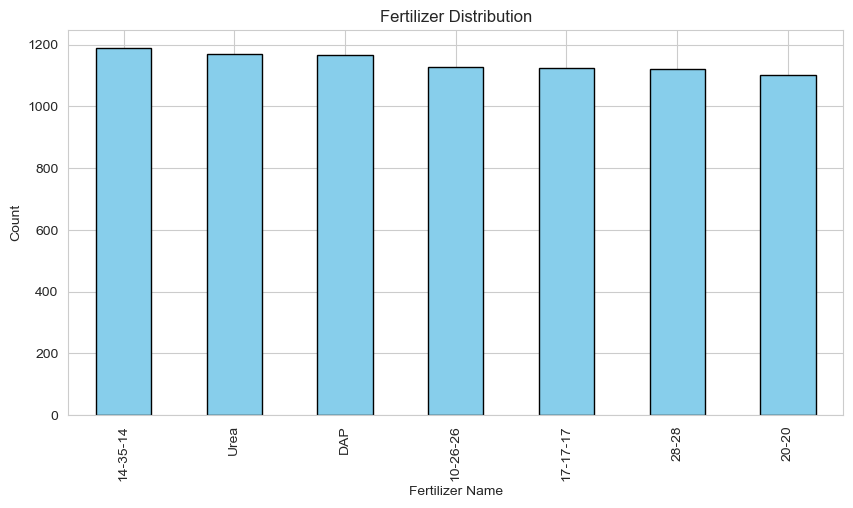

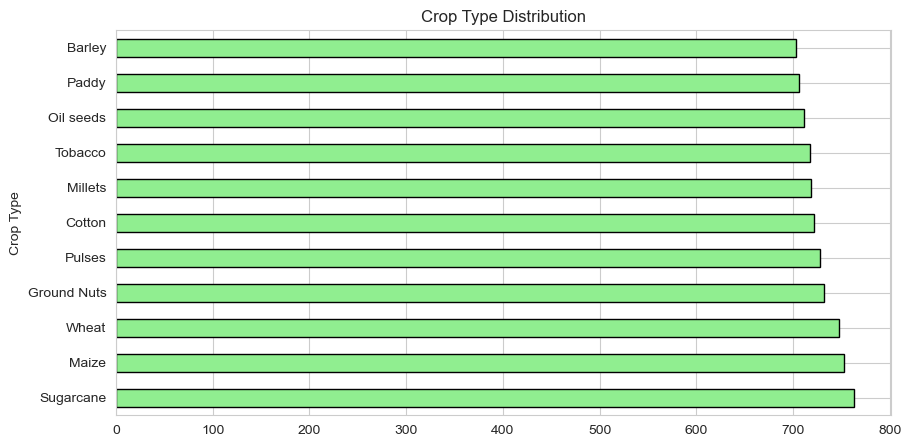

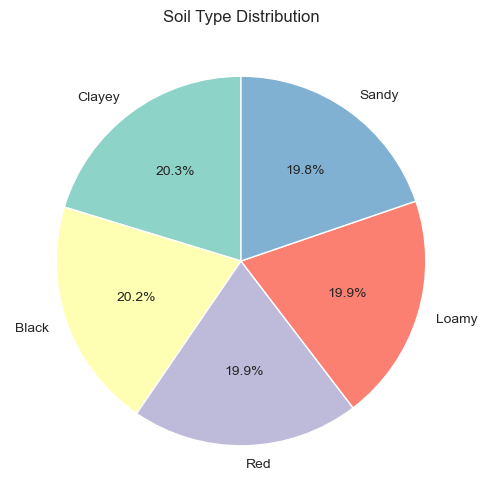

Random Forest: Test Accuracy = 14.12%, CV Accuracy = 14.75% (+/- 1.04%)
XGBoost: Test Accuracy = 14.37%, CV Accuracy = 14.62% (+/- 0.76%)
Random Forest Top-2 Accuracy: 30.12%
XGBoost Top-2 Accuracy: 29.19%


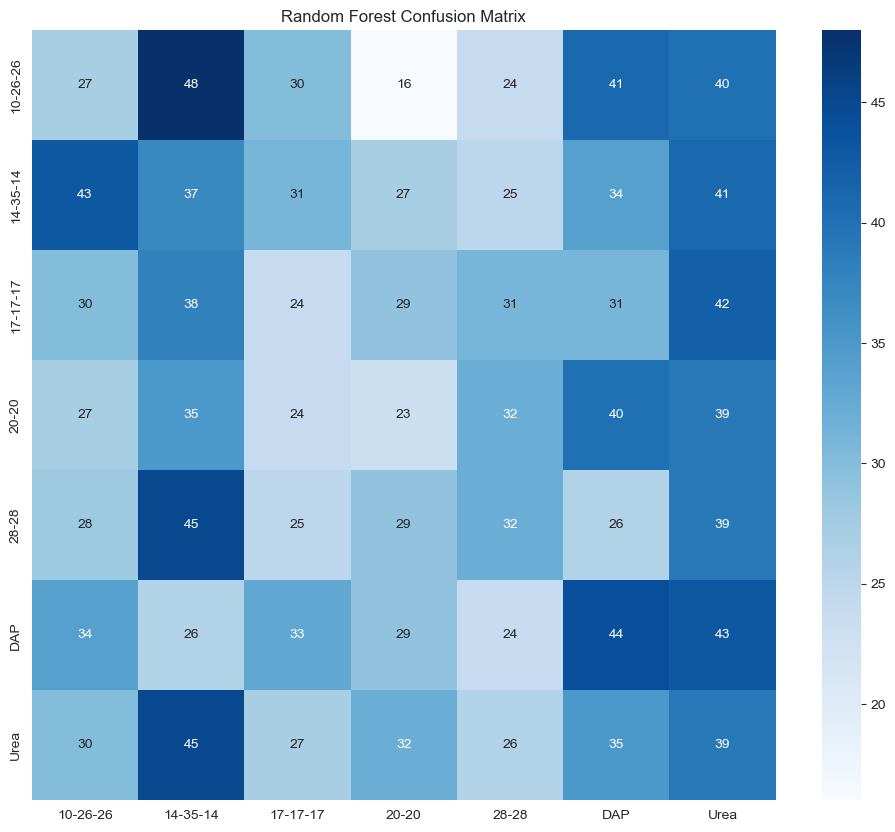

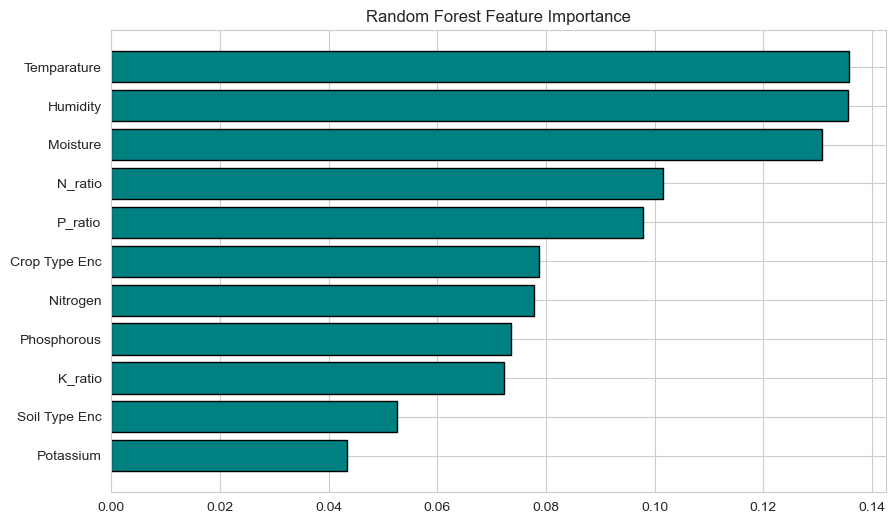

✅ Models and encoders saved successfully!


In [28]:
# ==================== IMPORTS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, top_k_accuracy_score
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ==================== LOAD DATA ====================
df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")

print("📊 Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

# ==================== EXPLORATORY DATA ANALYSIS ====================
# Fertilizer distribution
plt.figure(figsize=(10,5))
df['Fertilizer Name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Fertilizer Distribution')
plt.ylabel('Count')
plt.show()

# Crop distribution
plt.figure(figsize=(10,5))
df['Crop Type'].value_counts().plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Crop Type Distribution')
plt.show()

# Soil distribution
plt.figure(figsize=(6,6))
soil_counts = df['Soil Type'].value_counts()
plt.pie(soil_counts.values, labels=soil_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3(range(len(soil_counts))))
plt.title('Soil Type Distribution')
plt.show()

# ==================== FEATURE ENGINEERING ====================
# Encode categorical features
le_soil = LabelEncoder()
df['Soil Type Enc'] = le_soil.fit_transform(df['Soil Type'])

le_crop = LabelEncoder()
df['Crop Type Enc'] = le_crop.fit_transform(df['Crop Type'])

# Create N-P-K ratios
df['N_ratio'] = df['Nitrogen'] / (df['Nitrogen'] + df['Phosphorous'] + df['Potassium'])
df['P_ratio'] = df['Phosphorous'] / (df['Nitrogen'] + df['Phosphorous'] + df['Potassium'])
df['K_ratio'] = df['Potassium'] / (df['Nitrogen'] + df['Phosphorous'] + df['Potassium'])

# Features and target
feature_cols = ['Temparature', 'Humidity', 'Moisture', 'Soil Type Enc', 'Crop Type Enc', 'Nitrogen', 'Phosphorous', 'Potassium', 'N_ratio', 'P_ratio', 'K_ratio']
X = df[feature_cols]
y = df['Fertilizer Name']

# Encode target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==================== MODEL TRAINING ====================
models = {}

# Random Forest
rf_model = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_leaf=3, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_cv = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
models['Random Forest'] = rf_model

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, eval_metric='mlogloss', use_label_encoder=False, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_cv = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)
models['XGBoost'] = xgb_model

# ==================== EVALUATION ====================
print("Random Forest: Test Accuracy = {:.2f}%, CV Accuracy = {:.2f}% (+/- {:.2f}%)".format(rf_acc*100, rf_cv.mean()*100, rf_cv.std()*100))
print("XGBoost: Test Accuracy = {:.2f}%, CV Accuracy = {:.2f}% (+/- {:.2f}%)".format(xgb_acc*100, xgb_cv.mean()*100, xgb_cv.std()*100))

# Top-2 accuracy
top2_rf = top_k_accuracy_score(y_test, rf_model.predict_proba(X_test_scaled), k=2)
top2_xgb = top_k_accuracy_score(y_test, xgb_model.predict_proba(X_test_scaled), k=2)
print("Random Forest Top-2 Accuracy: {:.2f}%".format(top2_rf*100))
print("XGBoost Top-2 Accuracy: {:.2f}%".format(top2_xgb*100))

# Confusion matrix for Random Forest
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_target.classes_, yticklabels=le_target.classes_, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Feature importance
feat_importance = pd.DataFrame({'Feature': feature_cols, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='teal', edgecolor='black')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# ==================== SAVE MODELS ====================
with open('../models/fertilizer_rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('fertilizer_xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
with open('../models/fertilizer_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('fertilizer_le_target.pkl', 'wb') as f:
    pickle.dump(le_target, f)
with open('../models/soil_encoder.pkl', 'wb') as f:
    pickle.dump(le_soil, f)
with open('../models/crop_encoder.pkl', 'wb') as f:
    pickle.dump(le_crop, f)

print("✅ Models and encoders saved successfully!")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits

🏆 Voting Ensemble Test Accuracy: 14.31%
🔹 Top-2 Accuracy: 28.81%
🔹 Top-3 Accuracy: 44.50%

📊 Classification Report:
              precision    recall  f1-score   support

    10-26-26       0.14      0.15      0.15       226
    14-35-14       0.15      0.14      0.15       238
    17-17-17       0.13      0.12      0.13       225
       20-20       0.16      0.17      0.16       220
       28-28       0.14      0.14      0.14       224
         DAP       0.13      0.13      0.13       233
        Urea       0.14      0.14      0.14       234

    accuracy                           0.14      1600
   macro avg       0.14      0.14      0.14      1600
weighted avg       0.14      0.14      0.14      1600



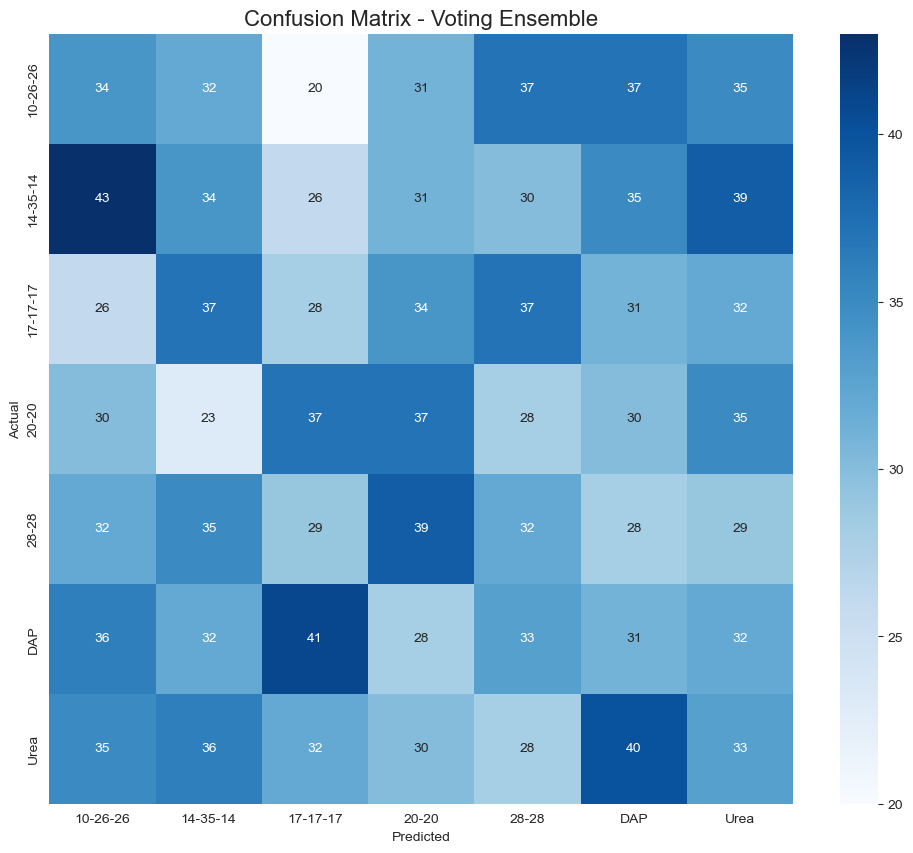

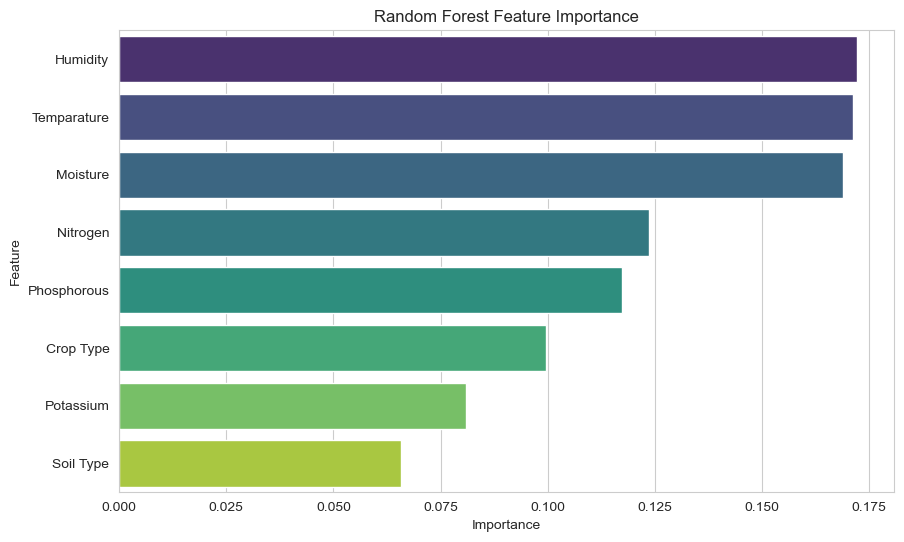


✅ Models and encoders saved successfully!


In [30]:
# ========================== IMPORTS ==========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, top_k_accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ========================== LOAD DATA ==========================
df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")

# Fix column names
df.columns = [c.strip() for c in df.columns]

# Feature columns
feature_columns = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium', 'Soil Type', 'Crop Type']
target_column = 'Fertilizer Name'

# Encode categorical features
le_soil = LabelEncoder()
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])

le_crop = LabelEncoder()
df['Crop Type'] = le_crop.fit_transform(df['Crop Type'])

X = df[feature_columns]
y = df[target_column]

# Encode target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# ========================== TRAIN-TEST SPLIT ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ========================== FEATURE SCALING ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================== RANDOM FOREST HYPERPARAMETER TUNING ==========================
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_search = RandomizedSearchCV(
    rf, rf_param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42
)
rf_search.fit(X_train_scaled, y_train)
best_rf = rf_search.best_estimator_

# ========================== XGBOOST HYPERPARAMETER TUNING ==========================
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42
)

xgb_param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    xgb_model, xgb_param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42
)
xgb_search.fit(X_train_scaled, y_train)
best_xgb = xgb_search.best_estimator_

# ========================== VOTING ENSEMBLE ==========================
voting_model = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)],
    voting='soft', n_jobs=-1
)
voting_model.fit(X_train_scaled, y_train)

# ========================== EVALUATION ==========================
y_pred = voting_model.predict(X_test_scaled)

# Accuracy
test_acc = accuracy_score(y_test, y_pred)
top2_acc = top_k_accuracy_score(y_test, voting_model.predict_proba(X_test_scaled), k=2)
top3_acc = top_k_accuracy_score(y_test, voting_model.predict_proba(X_test_scaled), k=3)

print(f"\n🏆 Voting Ensemble Test Accuracy: {test_acc*100:.2f}%")
print(f"🔹 Top-2 Accuracy: {top2_acc*100:.2f}%")
print(f"🔹 Top-3 Accuracy: {top3_acc*100:.2f}%")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Voting Ensemble', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ========================== FEATURE IMPORTANCE ==========================
importances = best_rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_columns, 'Importance': importances}).sort_values('Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

# ========================== SAVE MODELS ==========================
with open('../models/fertilizer_voting_model.pkl', 'wb') as f:
    pickle.dump(voting_model, f)
with open('../models/fertilizer_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('../models/fertilizer_target_encoder.pkl', 'wb') as f:
    pickle.dump(le_target, f)
with open('../models/soil_encoder.pkl', 'wb') as f:
    pickle.dump(le_soil, f)
with open('../models/crop_encoder.pkl', 'wb') as f:
    pickle.dump(le_crop, f)

print("\n✅ Models and encoders saved successfully!")


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import pickle

# Load dataset
df = pd.read_csv(r"C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv")

# Features and target
feature_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium', 'Soil Type', 'Crop Type']
target_col = 'Fertilizer Name'

X = df[feature_cols]
y = df[target_col]

# Encode target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Encode categorical features
le_soil = LabelEncoder()
X['Soil Type'] = le_soil.fit_transform(X['Soil Type'])

le_crop = LabelEncoder()
X['Crop Type'] = le_crop.fit_transform(X['Crop Type'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
rf = RandomForestClassifier(n_estimators=300, max_depth=25, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=15, learning_rate=0.1, random_state=42, eval_metric='mlogloss')

# Voting ensemble (soft voting)
voting_model = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb_model)],
    voting='soft',
    n_jobs=-1
)

# Train ensemble
voting_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = voting_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Voting Ensemble Test Accuracy: {accuracy*100:.2f}%")

# Save model and encoders
with open('../models/fertilizer_voting_model.pkl', 'wb') as f:
    pickle.dump(voting_model, f)

with open('../models/fertilizer_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('../models/fertilizer_target_encoder.pkl', 'wb') as f:
    pickle.dump(le_target, f)

with open('../models/soil_encoder.pkl', 'wb') as f:
    pickle.dump(le_soil, f)

with open('../models/crop_encoder.pkl', 'wb') as f:
    pickle.dump(le_crop, f)

print("✅ Model and encoders saved successfully!")


✅ Voting Ensemble Test Accuracy: 13.94%
✅ Model and encoders saved successfully!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Create a folder to save all graphs
if not os.path.exists('fertilizer_graphs'):
    os.makedirs('fertilizer_graphs')
print("📁 Created 'fertilizer_graphs' folder to save all visualizations\n")

# ==================== LOAD DATA ====================
print("Loading dataset...")
df = pd.read_csv(r'C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv')

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

print(f"✅ Dataset loaded: {len(df)} records")
print(f"📋 Columns found: {df.columns.tolist()}\n")

# ==================== COMPREHENSIVE STATISTICAL ANALYSIS ====================
print("=" * 80)
print("CALCULATING COMPREHENSIVE STATISTICS")
print("=" * 80)

# Get numerical columns (adjust based on actual column names)
numerical_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium']

# Create comprehensive statistics dataframe
stats_data = []
for col in numerical_cols:
    col_data = df[col].dropna()
    stats = {
        'Feature': col.strip(),
        'Count': len(col_data),
        'Mean': col_data.mean(),
        'Median': col_data.median(),
        'Mode': col_data.mode()[0] if len(col_data.mode()) > 0 else np.nan,
        'Std Dev': col_data.std(),
        'Variance': col_data.var(),
        'Min': col_data.min(),
        'Max': col_data.max(),
        'Range': col_data.max() - col_data.min(),
        '25th Percentile (Q1)': col_data.quantile(0.25),
        '50th Percentile (Q2)': col_data.quantile(0.50),
        '75th Percentile (Q3)': col_data.quantile(0.75),
        '90th Percentile': col_data.quantile(0.90),
        '95th Percentile': col_data.quantile(0.95),
        'IQR': col_data.quantile(0.75) - col_data.quantile(0.25),
        'Skewness': col_data.skew(),
        'Kurtosis': col_data.kurtosis()
    }
    stats_data.append(stats)

stats_df = pd.DataFrame(stats_data)

print("\n📈 DETAILED STATISTICAL MEASURES:")
print("=" * 120)
print(stats_df.to_string(index=False))
print("=" * 120)

# Save statistics to CSV
stats_df.to_csv('../docs/graphs/statistical_summary.csv', index=False)
print("\n✅ Statistical summary saved as '../docs/graphs/statistical_summary.csv'\n")

# ==================== GRAPH 1: STATISTICAL SUMMARY TABLE ====================
print("📊 Creating Graph 1: Statistical Summary Table...")
fig, ax = plt.subplots(figsize=(18, 10))
ax.axis('tight')
ax.axis('off')

# Prepare data for table (Main statistics)
table_data = []
table_data.append(['Feature', 'Mean', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', 'Range'])
for _, row in stats_df.iterrows():
    table_data.append([
        row['Feature'],
        f"{row['Mean']:.2f}",
        f"{row['Median']:.2f}",
        f"{row['Std Dev']:.2f}",
        f"{row['Variance']:.2f}",
        f"{row['Min']:.2f}",
        f"{row['Max']:.2f}",
        f"{row['Range']:.2f}"
    ])

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.15, 0.12, 0.12, 0.12, 0.12, 0.1, 0.1, 0.12])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style the header
for i in range(8):
    table[(0, i)].set_facecolor('#2E7D32')
    table[(0, i)].set_text_props(weight='bold', color='white', size=12)

# Alternate row colors
for i in range(1, len(table_data)):
    for j in range(8):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#E8F5E9')
        else:
            table[(i, j)].set_facecolor('white')

plt.title('Statistical Summary of Features', fontsize=18, fontweight='bold', pad=20)
plt.savefig('../docs/graphs/01_statistical_summary_table.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 01_statistical_summary_table.png")
plt.close()

# ==================== GRAPH 2: PERCENTILE TABLE ====================
print("📊 Creating Graph 2: Percentile Analysis Table...")
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('tight')
ax.axis('off')

# Prepare percentile data for table
percentile_data = []
percentile_data.append(['Feature', '25th %ile', '50th %ile', '75th %ile', '90th %ile', '95th %ile', 'IQR', 'Skewness', 'Kurtosis'])
for _, row in stats_df.iterrows():
    percentile_data.append([
        row['Feature'],
        f"{row['25th Percentile (Q1)']:.2f}",
        f"{row['50th Percentile (Q2)']:.2f}",
        f"{row['75th Percentile (Q3)']:.2f}",
        f"{row['90th Percentile']:.2f}",
        f"{row['95th Percentile']:.2f}",
        f"{row['IQR']:.2f}",
        f"{row['Skewness']:.2f}",
        f"{row['Kurtosis']:.2f}"
    ])

table2 = ax.table(cellText=percentile_data, cellLoc='center', loc='center',
                 colWidths=[0.14, 0.11, 0.11, 0.11, 0.11, 0.11, 0.1, 0.1, 0.1])
table2.auto_set_font_size(False)
table2.set_fontsize(11)
table2.scale(1, 2.5)

# Style the header
for i in range(9):
    table2[(0, i)].set_facecolor('#1565C0')
    table2[(0, i)].set_text_props(weight='bold', color='white', size=12)

# Alternate row colors
for i in range(1, len(percentile_data)):
    for j in range(9):
        if i % 2 == 0:
            table2[(i, j)].set_facecolor('#E3F2FD')
        else:
            table2[(i, j)].set_facecolor('white')

plt.title('Percentile Analysis & Distribution Metrics', fontsize=18, fontweight='bold', pad=20)
plt.savefig('../docs/graphs/02_percentile_analysis_table.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 02_percentile_analysis_table.png")
plt.close()

# ==================== GRAPH 3: BOX PLOTS ====================
print("📊 Creating Graph 3: Box Plots with Statistics...")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Box Plots - Distribution & Outlier Analysis', fontsize=18, fontweight='bold', y=0.995)

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black', linewidth=2),
                    whiskerprops=dict(color='black', linewidth=1.5),
                    capprops=dict(color='black', linewidth=1.5),
                    medianprops=dict(color='red', linewidth=2),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))
    
    ax.set_ylabel('Value', fontsize=11, fontweight='bold')
    ax.set_title(col.strip(), fontsize=13, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics text
    stats_text = f"Mean: {df[col].mean():.2f}\nMedian: {df[col].median():.2f}\nStd: {df[col].std():.2f}"
    ax.text(1.15, 0.5, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../docs/graphs/03_boxplot_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 03_boxplot_analysis.png")
plt.close()

# ==================== GRAPH 4: DISTRIBUTION HISTOGRAMS ====================
print("📊 Creating Graph 4: Distribution Histograms...")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Feature Distribution Analysis', fontsize=18, fontweight='bold', y=0.995)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#FFD93D']

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    data = df[col].dropna()
    ax.hist(data, bins=30, color=colors[idx], edgecolor='black', alpha=0.7)
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    ax.axvline(data.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    ax.set_xlabel(col.strip(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'{col.strip()} Distribution', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/graphs/04_distribution_histograms.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 04_distribution_histograms.png")
plt.close()

# ==================== GRAPH 5: CORRELATION HEATMAP ====================
print("📊 Creating Graph 5: Correlation Heatmap...")
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, cmap='RdYlGn', center=0, 
            linewidths=2, linecolor='black', fmt='.2f', 
            mask=mask, square=True, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 11, 'weight': 'bold'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../docs/graphs/05_correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 05_correlation_heatmap.png")
plt.close()

# ==================== GRAPH 6: FERTILIZER DISTRIBUTION ====================
print("📊 Creating Graph 6: Fertilizer Distribution...")
fertilizer_counts = df['Fertilizer Name'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Fertilizer Type Distribution Analysis', fontsize=16, fontweight='bold')

# Bar chart
fertilizer_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black', linewidth=1.5)
ax1.set_title('Fertilizer Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Fertilizer Name', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(fertilizer_counts):
    ax1.text(i, v + max(fertilizer_counts) * 0.01, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors_pie = plt.cm.Set3(range(len(fertilizer_counts)))
ax2.pie(fertilizer_counts.values, labels=fertilizer_counts.index, autopct='%1.1f%%', 
        colors=colors_pie, startangle=90, textprops={'fontsize': 10, 'weight': 'bold'})
ax2.set_title('Fertilizer Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/graphs/06_fertilizer_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 06_fertilizer_distribution.png")
plt.close()

# ==================== GRAPH 7: SOIL TYPE DISTRIBUTION ====================
print("📊 Creating Graph 7: Soil Type Distribution...")
soil_counts = df['Soil Type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Soil Type Distribution Analysis', fontsize=16, fontweight='bold')

# Bar chart
soil_counts.plot(kind='bar', ax=ax1, color='brown', edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.set_title('Soil Type Count', fontsize=14, fontweight='bold')
ax1.set_xlabel('Soil Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(soil_counts):
    ax1.text(i, v + max(soil_counts) * 0.01, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors_pie = plt.cm.Pastel1(range(len(soil_counts)))
ax2.pie(soil_counts.values, labels=soil_counts.index, autopct='%1.1f%%', 
        colors=colors_pie, startangle=90, textprops={'fontsize': 11, 'weight': 'bold'})
ax2.set_title('Soil Type Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/graphs/07_soil_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 07_soil_distribution.png")
plt.close()

# ==================== GRAPH 8: CROP TYPE DISTRIBUTION ====================
print("📊 Creating Graph 8: Crop Type Distribution...")
crop_counts = df['Crop Type'].value_counts()

plt.figure(figsize=(14, 8))
crop_counts.plot(kind='barh', color='lightgreen', edgecolor='black', linewidth=1.5)
plt.title('Crop Type Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Crop Type', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(crop_counts):
    plt.text(v + max(crop_counts) * 0.01, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/graphs/08_crop_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 08_crop_distribution.png")
plt.close()

# ==================== GRAPH 9: PERCENTILE COMPARISON ====================
print("📊 Creating Graph 9: Percentile Comparison...")
fig, ax = plt.subplots(figsize=(16, 8))
percentiles = ['25th Percentile (Q1)', '50th Percentile (Q2)', '75th Percentile (Q3)', '90th Percentile', '95th Percentile']
x = np.arange(len(stats_df))
width = 0.15

colors_bar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for i, percentile in enumerate(percentiles):
    values = stats_df[percentile].values
    bars = ax.bar(x + i * width, values, width, label=percentile.replace('Percentile', '%ile'), 
                  color=colors_bar[i], edgecolor='black', linewidth=1)

ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('Values', fontsize=12, fontweight='bold')
ax.set_title('Percentile Distribution Across Features', fontsize=16, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(stats_df['Feature'], rotation=45, ha='right', fontweight='bold')
ax.legend(fontsize=10, loc='upper left')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../docs/graphs/09_percentile_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 09_percentile_comparison.png")
plt.close()

# ==================== GRAPH 10: MEAN VS MEDIAN COMPARISON ====================
print("📊 Creating Graph 10: Mean vs Median Comparison...")
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(stats_df))
width = 0.35

bars1 = ax.bar(x - width/2, stats_df['Mean'], width, label='Mean', 
               color='#FF6B6B', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, stats_df['Median'], width, label='Median', 
               color='#4ECDC4', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('Values', fontsize=12, fontweight='bold')
ax.set_title('Mean vs Median Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(stats_df['Feature'], rotation=45, ha='right', fontweight='bold')
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/graphs/10_mean_median_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 10_mean_median_comparison.png")
plt.close()

# ==================== GRAPH 11: STANDARD DEVIATION & VARIANCE ====================
print("📊 Creating Graph 11: Standard Deviation & Variance...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Variability Analysis', fontsize=16, fontweight='bold')

# Standard Deviation
ax1.bar(stats_df['Feature'], stats_df['Std Dev'], color='orange', edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Features', fontsize=12, fontweight='bold')
ax1.set_ylabel('Standard Deviation', fontsize=12, fontweight='bold')
ax1.set_title('Standard Deviation by Feature', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(stats_df['Std Dev']):
    ax1.text(i, v + max(stats_df['Std Dev']) * 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Variance
ax2.bar(stats_df['Feature'], stats_df['Variance'], color='purple', edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.set_xlabel('Features', fontsize=12, fontweight='bold')
ax2.set_ylabel('Variance', fontsize=12, fontweight='bold')
ax2.set_title('Variance by Feature', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(stats_df['Variance']):
    ax2.text(i, v + max(stats_df['Variance']) * 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/graphs/11_std_variance_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 11_std_variance_analysis.png")
plt.close()

# ==================== GRAPH 12: SKEWNESS & KURTOSIS ====================
print("📊 Creating Graph 12: Skewness & Kurtosis Analysis...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Distribution Shape Analysis', fontsize=16, fontweight='bold')

# Skewness
colors_skew = ['green' if x > -0.5 and x < 0.5 else 'orange' if abs(x) < 1 else 'red' for x in stats_df['Skewness']]
ax1.bar(stats_df['Feature'], stats_df['Skewness'], color=colors_skew, edgecolor='black', linewidth=1.5)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax1.axhline(y=0.5, color='orange', linestyle='--', linewidth=1, alpha=0.5)
ax1.axhline(y=-0.5, color='orange', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_xlabel('Features', fontsize=12, fontweight='bold')
ax1.set_ylabel('Skewness', fontsize=12, fontweight='bold')
ax1.set_title('Skewness by Feature', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(stats_df['Skewness']):
    ax1.text(i, v + 0.1 if v > 0 else v - 0.1, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

# Kurtosis
colors_kurt = ['green' if abs(x) < 1 else 'orange' if abs(x) < 3 else 'red' for x in stats_df['Kurtosis']]
ax2.bar(stats_df['Feature'], stats_df['Kurtosis'], color=colors_kurt, edgecolor='black', linewidth=1.5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax2.set_xlabel('Features', fontsize=12, fontweight='bold')
ax2.set_ylabel('Kurtosis', fontsize=12, fontweight='bold')
ax2.set_title('Kurtosis by Feature', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(stats_df['Kurtosis']):
    ax2.text(i, v + 0.2 if v > 0 else v - 0.2, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/graphs/12_skewness_kurtosis_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: 12_skewness_kurtosis_analysis.png")
plt.close()

# ==================== SUMMARY ====================
print("\n" + "=" * 80)
print("✅ ALL GRAPHS SAVED SUCCESSFULLY!")
print("=" * 80)
print(f"\n📁 Location: ../docs/graphs/")
print(f"📊 Total graphs created: 12")
print(f"📄 Statistical summary CSV: statistical_summary.csv")
print("\n📋 List of saved graphs:")
print("   1. Statistical Summary Table")
print("   2. Percentile Analysis Table")
print("   3. Box Plot Analysis")
print("   4. Distribution Histograms")
print("   5. Correlation Heatmap")
print("   6. Fertilizer Distribution")
print("   7. Soil Distribution")
print("   8. Crop Distribution")
print("   9. Percentile Comparison")
print("   10. Mean vs Median Comparison")
print("   11. Standard Deviation & Variance Analysis")
print("   12. Skewness & Kurtosis Analysis")
print("\n🎨 All graphs are saved in high resolution (300 DPI) - Perfect for posters!")
print("=" * 80)

📁 Created 'fertilizer_graphs' folder to save all visualizations

Loading dataset...
✅ Dataset loaded: 8000 records
📋 Columns found: ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']

CALCULATING COMPREHENSIVE STATISTICS

📈 DETAILED STATISTICAL MEASURES:
    Feature  Count      Mean  Median  Mode   Std Dev   Variance   Min  Max  Range  25th Percentile (Q1)  50th Percentile (Q2)  75th Percentile (Q3)  90th Percentile  95th Percentile     IQR  Skewness  Kurtosis
Temparature   8000 30.338895   30.24  40.0  4.478262  20.054831 20.00 40.0  20.00               27.0500                 30.24               33.4600           36.500          38.2105  6.4100  0.101795 -0.589224
   Humidity   8000 59.210731   59.11  60.0  8.177366  66.869312 40.02 80.0  39.98               53.2775                 59.11               65.0825           70.210          73.0215 11.8050  0.056432 -0.562919
   Moisture   8000 43.580862   42.25  70.

In [6]:
import os
print(os.getcwd())

C:\Users\OMEN


In [8]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(r'C:\Users\OMEN\OneDrive\Documents\fertilizer_Prediction.csv')
df.columns = df.columns.str.strip()

# Calculate all statistics
numerical_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium']

print("=" * 80)
print("FERTILIZER PREDICTION DATASET - STATISTICAL ANALYSIS")
print("=" * 80)

# Mean
print("\n📊 Mean (µ):")
print(f"* Temperature = {df['Temparature'].mean():.1f}°C")
print(f"* Humidity = {df['Humidity'].mean():.1f}%")
print(f"* Moisture = {df['Moisture'].mean():.1f}%")
print(f"* N = {df['Nitrogen'].mean():.1f}")
print(f"* P = {df['Phosphorous'].mean():.1f}")
print(f"* K = {df['Potassium'].mean():.1f}")

# Median
print("\n📊 Median:")
print(f"* Temperature = {df['Temparature'].median():.1f}°C")
print(f"* Humidity = {df['Humidity'].median():.1f}%")
print(f"* Moisture = {df['Moisture'].median():.1f}%")
print(f"* N = {df['Nitrogen'].median():.0f}")
print(f"* P = {df['Phosphorous'].median():.0f}")
print(f"* K = {df['Potassium'].median():.0f}")

# Mode
print("\n📊 Mode:")
print(f"* Soil Type = {df['Soil Type'].mode()[0]}")
print(f"* Crop Type = {df['Crop Type'].mode()[0]}")
print(f"* Fertilizer = {df['Fertilizer Name'].mode()[0]}")

# Minimum & Maximum
print("\n📊 Minimum & Maximum:")
print(f"* Temperature = (Min: {df['Temparature'].min():.1f}°C, Max: {df['Temparature'].max():.1f}°C)")
print(f"* Humidity = (Min: {df['Humidity'].min():.1f}%, Max: {df['Humidity'].max():.1f}%)")
print(f"* Moisture = (Min: {df['Moisture'].min():.1f}%, Max: {df['Moisture'].max():.1f}%)")
print(f"* N = (Min: {df['Nitrogen'].min():.0f}, Max: {df['Nitrogen'].max():.0f})")
print(f"* P = (Min: {df['Phosphorous'].min():.0f}, Max: {df['Phosphorous'].max():.0f})")
print(f"* K = (Min: {df['Potassium'].min():.0f}, Max: {df['Potassium'].max():.0f})")

# Range
print("\n📊 Range:")
print(f"* Temperature = {df['Temparature'].max() - df['Temparature'].min():.1f}°C")
print(f"* Humidity = {df['Humidity'].max() - df['Humidity'].min():.1f}%")
print(f"* Moisture = {df['Moisture'].max() - df['Moisture'].min():.1f}%")
print(f"* N = {df['Nitrogen'].max() - df['Nitrogen'].min():.0f}")
print(f"* P = {df['Phosphorous'].max() - df['Phosphorous'].min():.0f}")
print(f"* K = {df['Potassium'].max() - df['Potassium'].min():.0f}")

# Standard Deviation
print("\n📊 Standard Deviation (σ):")
print(f"* Temperature = {df['Temparature'].std():.1f}")
print(f"* Humidity = {df['Humidity'].std():.1f}")
print(f"* Moisture = {df['Moisture'].std():.1f}")
print(f"* N = {df['Nitrogen'].std():.1f}")
print(f"* P = {df['Phosphorous'].std():.1f}")
print(f"* K = {df['Potassium'].std():.1f}")

# Variance
print("\n📊 Variance (σ²):")
print(f"* Temperature = {df['Temparature'].var():.1f}")
print(f"* Humidity = {df['Humidity'].var():.1f}")
print(f"* Moisture = {df['Moisture'].var():.1f}")
print(f"* N = {df['Nitrogen'].var():.1f}")
print(f"* P = {df['Phosphorous'].var():.1f}")
print(f"* K = {df['Potassium'].var():.1f}")

# Quartiles
print("\n📊 Quartiles (Q1, Q2, Q3):")
print(f"* Temperature = (Q1={df['Temparature'].quantile(0.25):.1f}, Q2={df['Temparature'].quantile(0.5):.1f}, Q3={df['Temparature'].quantile(0.75):.1f})")
print(f"* Humidity = (Q1={df['Humidity'].quantile(0.25):.1f}, Q2={df['Humidity'].quantile(0.5):.1f}, Q3={df['Humidity'].quantile(0.75):.1f})")
print(f"* Moisture = (Q1={df['Moisture'].quantile(0.25):.1f}, Q2={df['Moisture'].quantile(0.5):.1f}, Q3={df['Moisture'].quantile(0.75):.1f})")
print(f"* N = (Q1={df['Nitrogen'].quantile(0.25):.0f}, Q2={df['Nitrogen'].quantile(0.5):.0f}, Q3={df['Nitrogen'].quantile(0.75):.0f})")
print(f"* P = (Q1={df['Phosphorous'].quantile(0.25):.0f}, Q2={df['Phosphorous'].quantile(0.5):.0f}, Q3={df['Phosphorous'].quantile(0.75):.0f})")
print(f"* K = (Q1={df['Potassium'].quantile(0.25):.0f}, Q2={df['Potassium'].quantile(0.5):.0f}, Q3={df['Potassium'].quantile(0.75):.0f})")

# IQR
print("\n📊 IQR (Interquartile Range):")
print(f"* Temperature = {df['Temparature'].quantile(0.75) - df['Temparature'].quantile(0.25):.1f}")
print(f"* Humidity = {df['Humidity'].quantile(0.75) - df['Humidity'].quantile(0.25):.1f}")
print(f"* Moisture = {df['Moisture'].quantile(0.75) - df['Moisture'].quantile(0.25):.1f}")
print(f"* N = {df['Nitrogen'].quantile(0.75) - df['Nitrogen'].quantile(0.25):.0f}")
print(f"* P = {df['Phosphorous'].quantile(0.75) - df['Phosphorous'].quantile(0.25):.0f}")
print(f"* K = {df['Potassium'].quantile(0.75) - df['Potassium'].quantile(0.25):.0f}")

# Skewness & Kurtosis
print("\n📊 Skewness:")
print(f"* Temperature = {df['Temparature'].skew():.2f}")
print(f"* Humidity = {df['Humidity'].skew():.2f}")
print(f"* Moisture = {df['Moisture'].skew():.2f}")
print(f"* N = {df['Nitrogen'].skew():.2f}")
print(f"* P = {df['Phosphorous'].skew():.2f}")
print(f"* K = {df['Potassium'].skew():.2f}")

print("\n📊 Kurtosis:")
print(f"* Temperature = {df['Temparature'].kurtosis():.2f}")
print(f"* Humidity = {df['Humidity'].kurtosis():.2f}")
print(f"* Moisture = {df['Moisture'].kurtosis():.2f}")
print(f"* N = {df['Nitrogen'].kurtosis():.2f}")
print(f"* P = {df['Phosphorous'].kurtosis():.2f}")
print(f"* K = {df['Potassium'].kurtosis():.2f}")

print("\n" + "=" * 80)
print("✅ STATISTICAL ANALYSIS COMPLETE")
print("=" * 80)

FERTILIZER PREDICTION DATASET - STATISTICAL ANALYSIS

📊 Mean (µ):
* Temperature = 30.3°C
* Humidity = 59.2%
* Moisture = 43.6%
* N = 18.4
* P = 18.5
* K = 3.9

📊 Median:
* Temperature = 30.2°C
* Humidity = 59.1%
* Moisture = 42.2%
* N = 14
* P = 18
* K = 1

📊 Mode:
* Soil Type = Clayey
* Crop Type = Sugarcane
* Fertilizer = 14-35-14

📊 Minimum & Maximum:
* Temperature = (Min: 20.0°C, Max: 40.0°C)
* Humidity = (Min: 40.0%, Max: 80.0%)
* Moisture = (Min: 20.0%, Max: 70.0%)
* N = (Min: 0, Max: 46)
* P = (Min: 0, Max: 46)
* K = (Min: 0, Max: 23)

📊 Range:
* Temperature = 20.0°C
* Humidity = 40.0%
* Moisture = 50.0%
* N = 46
* P = 46
* K = 23

📊 Standard Deviation (σ):
* Temperature = 4.5
* Humidity = 8.2
* Moisture = 12.6
* N = 11.9
* P = 13.2
* K = 5.5

📊 Variance (σ²):
* Temperature = 20.1
* Humidity = 66.9
* Moisture = 158.7
* N = 140.5
* P = 175.4
* K = 30.2

📊 Quartiles (Q1, Q2, Q3):
* Temperature = (Q1=27.1, Q2=30.2, Q3=33.5)
* Humidity = (Q1=53.3, Q2=59.1, Q3=65.1)
* Moisture = (Q1=